<img src="./img/BannerAirbnbRJ.jpg" alt="banner">


# Análise dos Dados do Airbnb - *Rio de Janeiro*

## Objetivo
Esse projeto tem o objetivo de traçar um perfil dos imóveis localizados na cidade do Rio de Janeiro que são alugados por meio da plataforma do Airbnb (https://www.airbnb.com.br/)

## Contextualização

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**, mesmo sem possuir **nenhum hotel**!

A principal função dessa plataforma é conectar pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática.

No final de 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

O Airbnb disponibiliza os dados do seu site, para algumas das principais cidades do mundo. Esses dados são disponibilizados no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Nesse site é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Esse *notebook*, analisa os dados referentes à cidade Rio de Janeiro, e apresenta algumas conclusões obtidas a partir dos dados brutos.**

## Obtenção dos Dados

Os dados utilizados nesse projeto é o denominado "listings.csv", referente à cidade do Rio de Janeiro. Esse conjunto de dados é uma versão simplificada dos dados. Ele apresenta um resumo das informações e métricas dos imóveis alugados na cidade do Rio de Janeiro.

Os dados utilizados foram atualizados no dia 20 de abril de 2020


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [61]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


## Análise dos Dados


**Dicionário de Dados**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias



In [62]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **Q1. Quantos atributos (variáveis) e quantas registros o conjunto de dados possui? Quais os tipos das variáveis?**

In [63]:
# identificar o volume de dados do DataFrame

# verificar as 5 primeiras entradas do dataset
print('O conjunto de dados possui {} variáveis e {} registros'.format(len(df.columns), len(df)))

print('\nTipo dos dados:')
df.dtypes

O conjunto de dados possui 16 variáveis e 35870 registros

Tipo dos dados:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Analisando-se os tipos de dados, percebe-se que a princípio as colunas foram importadas com os tipos de dados corretos (colunas dos tipos int e float realmente estão com esses tipos de dados). A única exceção é a coluna last_review, que precisa ser transformada para o formato de data.

In [ ]:
df['last_review']=pd.to_datetime(df['last_review'])

In [65]:
menor_data=min(df['last_review'])
maior_data=max(df['last_review'])
print('A menor data de review é {}, e a maior é {}'.format(menor_data,maior_data))

A menor data de review é 2012-02-21 00:00:00, e a maior é 2020-04-21 00:00:00


Apesar da data de atualização do dataset constar como sendo 20/04/2020, existem reviews com data de 21/04/2020. Ou seja, os reviews variam no período de 21/02/2012 a 21/04/2020 (aproximadamente 8 anos de dados), o que indica que esse seja o período coberto pela bse de dados em questão.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [66]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print('Porcentagem de Valores Ausentes por coluna')
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Porcentagem de Valores Ausentes por coluna


neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Percebe-se que a coluna neighbourhood_group não possui nenhum valor preenchido, ou seja, ela nao tem nenhum valor para a base de dados. As colunas reviews_per_month e last_review também possuem uma grande quantidade de valores nulos (mais que 40%). Já as colunas name e host_name possuem uma quantidade bem pequena de valores nulos, e as demais colunas não apresentam valores nulos.

In [ ]:
df.drop(['neighbourhood_group'], axis=1, inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis numéricas?** 

* price
* minimum_nights
* number_of_reviews
* reviews_per_month
* calculated_host_listings_count
* availability_365



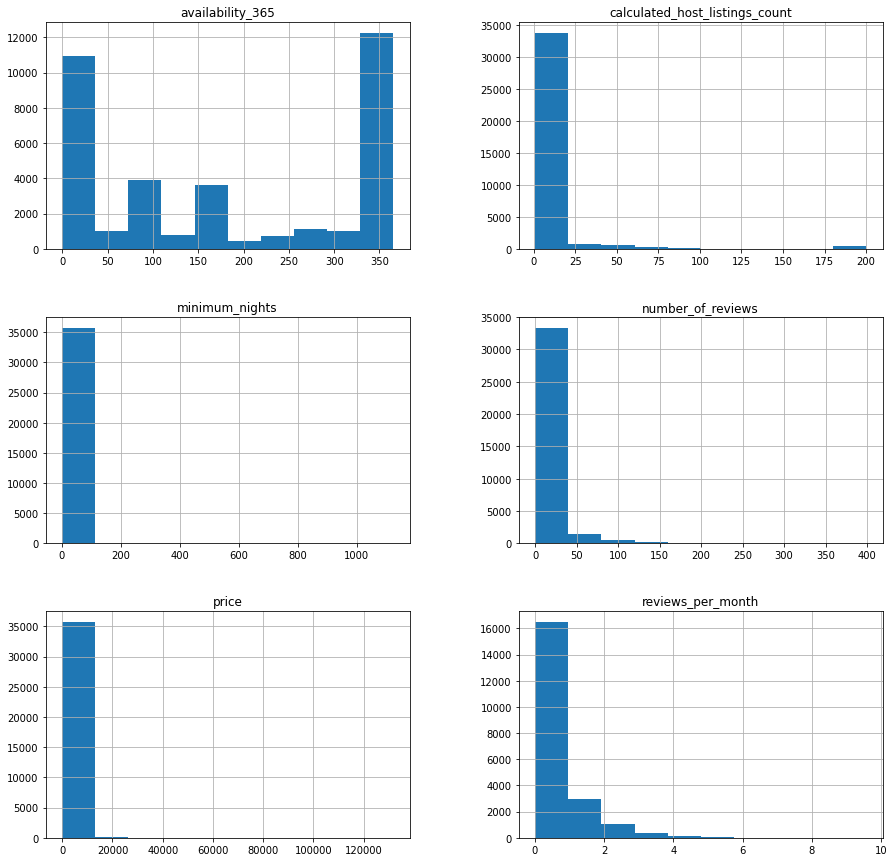

In [68]:
# plotar o histograma das variáveis numéricas
varNumericas=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']
df[varNumericas].hist(figsize=(15,15));

Pela Análise dos dados, percebe-se que algumas das colunas apresentam outliers que podem distorcer as análises.

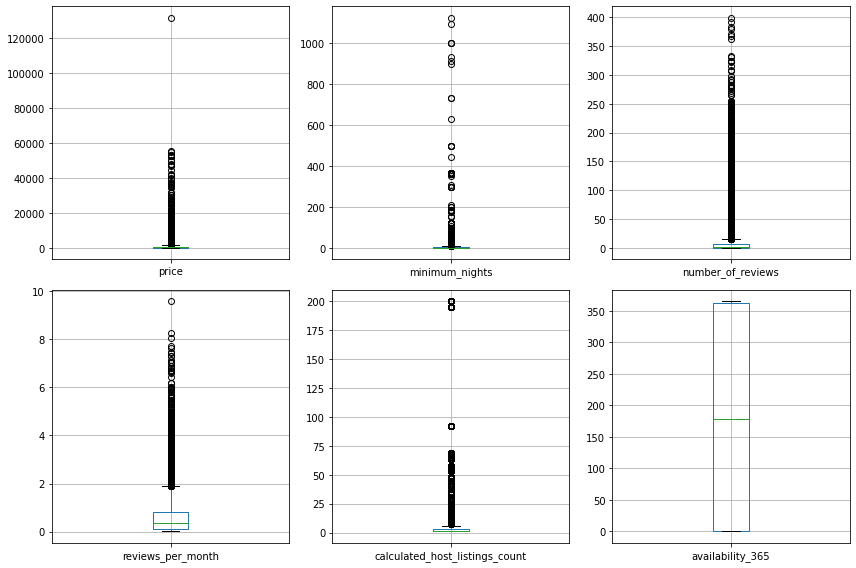

In [69]:
# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(varNumericas):
    plt.subplot(2, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

O Box-plot é um tipo de gráfico que facilita a vizualização de outliers. Pela análise dos gráficos gerados, conclui-se que apenas a variável 'availability_365' não possui outliers.

No caso das variáveis 'number_of_reviews', 'reviews_per_month' e 'calculated_host_listings_count', apesar de apresentarem outyliers, esses valores não são valores fora da realidade, pois não chega a ser nenhuma distorção o fato de um imóvel possuir cerca de 400 reviews (no total) ou uma média de 10 reviews por mês. Já a variavel 'calculated_host_listings_count', que indica o número de imóveis de um mesmo proprietário desperta atenção os valores próximos de 200, porém, no se pode afirmar que tais valores são irreais.

No entanto, quando se analisa as variáveis 'price' e 'minimum_nights' percebe-se claramente a existência de valores ora da realidade visto que existem registros que indicam o aluguel de imóveis por preços superiores a 120.000,00 e situações em que o número mínimo de noites para o imóvel é superior a 1000 dias.

Esse tipo de distorção provavelmente é oriunda de erros de cadastramento dos dados ou de falhas em alguma parte do processo de geração da base de dados. Esses tipos de distorções, além de evidenciarem erros nos dados, também  prejudicam as análises a serem realizadas, podendo levar a conclusões errôneas. Por tal razão esses dados "irreais" serão excluídos da base de dados. 

#### Retirada de outliers

Será feita a retirada dos outliers da variáveis --- utilizando-se a seguinte regra:
1. Divisão dos dados em Quartis
* 1º Quuartil (Q1): Ordena-se os dados de forma crescente e identifica-se o valor  que divide 25 % dos nenores valores dos 75% dos valores restantes. 
* 2º Quuartil (Q2): Ordena-se os dados de forma crescente e identifica-se o valor que divide 50 % dos nenores valores dos 50% dos valores restantes.
* 3º Quuartil (Q3): Ordena-se os dados de forma crescente e identifica-se o valor que divide 75 % dos nenores valores dos 25% dos valores restantes. 
<br><br>
2. Identificação do intervalo inter-quartl (IRQ = Q3 - Q1)
<br><br>
3. Definição dos valores de cortes (valores considerados outliers)
* Considera-se como outliers os valores que se enquadrem em ima das regras abaixo:
 * valores menores que Q1 - (1,5 * IRQ)
 * valores maiores que Q3 + (1,5 * IRQ)

##### Variável price

In [70]:
# Variável price

Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.5)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
print('Variável Price:')
print("O valor do 1º quartil é {}, o do 2º quartil (mediana) é {} e do 3º quartil é {}".format(Q1, Q2, Q3))
print("\nO intervalo inter quartil é {}".format(IQR))
print("\nNúmero de outliers: {}".format(len(df[((df.price < (Q1 - 1.5 * IQR)) | (df.price > (Q3 + 1.5 * IQR)))])))
print('\n Os outliers da variáveo Price são:')
df[((df.price < (Q1 - 1.5 * IQR)) | (df.price > (Q3 + 1.5 * IQR)))]['price']

Variável Price:
O valor do 1º quartil é 158.0, o do 2º quartil (mediana) é 298.0 e do 3º quartil é 632.0

O intervalo inter quartil é 474.0

Número de outliers: 3736

 Os outliers da variáveo Price são:


6         4036
11        3267
15        2366
57        1660
58       15951
         ...  
35852     8794
35853     7219
35854     7219
35855     7219
35856     7219
Name: price, Length: 3736, dtype: int64

In [ ]:
# retirada dos outliers
df=df[~((df.price < (Q1 - 1.5 * IQR)) | (df.price > (Q3 + 1.5 * IQR)))]

##### Variável minimum_nights

In [72]:
# Variável minimum_nights

Q1 = df.minimum_nights.quantile(0.25)
Q2 = df.minimum_nights.quantile(0.5)
Q3 = df.minimum_nights.quantile(0.75)
IQR = Q3 - Q1
print('Variável minimum_nights:')
print("O valor do 1º quartil é {}, o do 2º quartil (mediana) é {} e do 3º quartil é {}".format(Q1, Q2, Q3))
print("\nO intervalo inter quartil é {}".format(IQR))
print("\nNúmero de outliers: {}".format(len(df[((df.minimum_nights < (Q1 - 1.5 * IQR)) | (df.minimum_nights > (Q3 + 1.5 * IQR)))])))
print('\n Os outliers da variáveo Price são:')
df[((df.minimum_nights < (Q1 - 1.5 * IQR)) | (df.minimum_nights > (Q3 + 1.5 * IQR)))]['minimum_nights']

Variável minimum_nights:
O valor do 1º quartil é 1.0, o do 2º quartil (mediana) é 2.0 e do 3º quartil é 4.0

O intervalo inter quartil é 3.0

Número de outliers: 2010

 Os outliers da variáveo Price são:


54       90
97       10
109      30
125       9
159      90
         ..
35578    15
35589    30
35591    30
35592    15
35866    28
Name: minimum_nights, Length: 2010, dtype: int64

In [ ]:
df=df[~((df.minimum_nights < (Q1 - 1.5 * IQR)) | (df.minimum_nights > (Q3 + 1.5 * IQR)))]

##### Box-plot com a retirada dos outliers das variáveis price e minimum_nights

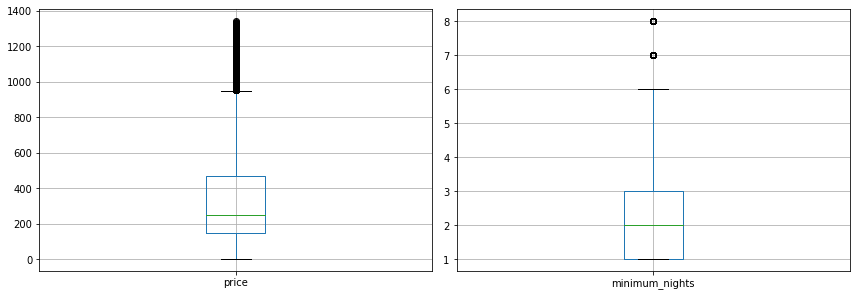

In [74]:
var=['price', 'minimum_nights']
# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(var):
    plt.subplot(2, 2, i + 1);
    df.boxplot(col);
    plt.tight_layout()

Percebe-se que mesmo após o tratamento dos dados, alguns valores considerados outliers persistem na base de dados, principalmente no caso da variável price. Isso ocorre porque quando os dados foram retirados, a nova configuração dos valores alterou os limites para a identificação dos outliers. No entanto, percebe-se que agora os valores, mesmo sendo considerados outliers, estão dentro de um limite de "plausivibilidade". Dessa forma, optou-se por manter os registros do jeito que estão.

**Observação:** é importante considerar que existem outras formas de tratamento de valores considerados outliers. Nesse caso específico, optou-se pela retirada dos regitros com outliers, no entanto, a forma de tratamento dos dados deve variar de acordo com os objetivos da análise que está sendo feita.

### **Q4. Qual a média dos preços de aluguel?**

In [75]:
# ver a média da coluna `price``
mediaPreco=df['price'].mean()
print('A média dos preços é de {}.'.format(mediaPreco))

A média dos preços é de 350.6983468330899.


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse.

A correlação pode ser positiva ou negativa. Uma correlação positiva entre 2 variáveis significa que sempre que uma variável aumentar a outra também aumenta e quando ela diminuir a outra também diminui. Já a correlação negativa apresenta o comportamento diferente ou seja, se uma variável aumenta a outra diminui, e vice-versa.

O valor absoluto da correlação varia entre zero e 1, sedo que uma correação igual a zero indica que as variáveis não possuem nenhum tipo de correlação, e uma correlação igual a 1 significa que as variáveis são totalmente correlacionadas.

Para calcular a correlação, é preciso se separar apenas as variáveis numéricas, e que tenham algum significado para o negócio: 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365'.

In [76]:
# criar uma matriz de correlação
varNumericas=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']
corr=df[varNumericas].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.184583,-0.153857,-0.161715,0.059537,-0.019757
minimum_nights,0.184583,1.000000,-0.055225,-0.139762,0.000261,-0.048480
number_of_reviews,-0.153857,-0.055225,1.000000,0.643384,-0.029719,0.054434
reviews_per_month,-0.161715,-0.139762,0.643384,1.000000,-0.014122,-0.016563
calculated_host_listings_count,0.059537,0.000261,-0.029719,-0.014122,1.000000,0.073982
availability_365,-0.019757,-0.048480,0.054434,-0.016563,0.073982,1.000000


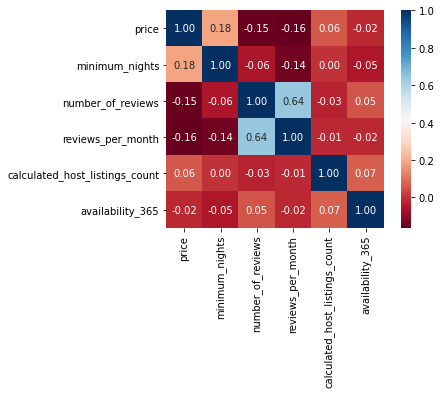

In [77]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pela análise, não se identifica grandes correlações entre as variáveis do dataset. As únicas variáveis que possuem uma correlação alta são as variáveis number_of_reviews e	reviews_per_month (64%), o que já era de se esperar, uma vez que tais variáveis armazenam informações semelhantes, ou seja, se o número de reviews por mês for alto, então, o número totam de reviews também será alto.

Também é importante se observar que a variável que possui maior correlação com o preço é a minimum_nights, que indica a quantidade mínima de noites para reserva. Ou seja, como essa correlação é possitiva (18%), identifica-se que imóveis que exigem uma quantidade maior número de noites mínimas para reserva tendem a presentar um preço maior.

A variável preço também apresentou correlação maior com as variáveis que indicam o número de revisões. Nesse caso, a correlação é negativa, ou seja, a medida que o preço eleva a tendência é que diminua o número de reviews.

No entano, é importante ressaltar que essas correlações da variável preço ainda são muito baixas, sendo assim, em hipotese alguma pode-se afirmar que o preço seja definido pela variação dessas 3 variáves. Tal correlação indica apenas uma tendência, sendo que, em um processo de aprendizagem de máquina em que se desejasse prever o preço de um imóvel, provavelmente tais variáveis teriam maior importância.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [78]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    20594
Private room        8651
Shared room          721
Hotel room           158
Name: room_type, dtype: int64

In [79]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/len(df)

Entire home/apt    0.683641
Private room       0.287180
Shared room        0.023934
Hotel room         0.005245
Name: room_type, dtype: float64

Também foi identificado a a grande maioria dos aluguéis feitos pela plataforma Airbnb na cidade do Rio de Janeiro referem-se a aluguéis do imóvel inteiro.

### **Q6. Qual a localidade mais cara do dataset?**



In [80]:
# ver preços por bairros, na média
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Vaz Lobo                  649.000000
Ricardo de Albuquerque    601.200000
Lagoa                     495.940199
Deodoro                   474.000000
Inhoaíba                  466.000000
                             ...    
Vila Militar               69.000000
Jardim América             69.000000
Honório Gurgel             64.000000
Galeão                     63.666667
Gericinó                   53.000000
Name: price, Length: 155, dtype: float64

Verificando o bairros em que o o aluguél é mais caro, identifica-se que os bairros de Vaz Lobo e de Ricardo de Albuquerque são os mais caros, o que contraria o senso comum. Sendo assim faz-se necessário a análise desses casos específicos.

In [81]:
df[df['neighbourhood']=='Vaz Lobo']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaT,NaN,1,0
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaT,NaN,1,362


In [82]:
df[df['neighbourhood']=='Ricardo de Albuquerque']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3945,3106028,Rent home for World Cup season,14962884,Gilcéa,Ricardo de Albuquerque,-22.83446,-43.38553,Private room,1000,1,0,NaT,NaN,1,365
14220,13927176,Rent for the 2016 Olympics,81890830,Luiz,Ricardo de Albuquerque,-22.83942,-43.40542,Entire home/apt,1063,1,0,NaT,NaN,1,89
15898,14251471,House for Olympics near Complex Deodoro,86752448,Rafael,Ricardo de Albuquerque,-22.83933,-43.39691,Entire home/apt,523,6,0,NaT,NaN,1,0
16244,14382360,PARQUE OLIMPICO DE DEODORO- FAMILIAR,88303678,Olimpia Catarina De,Ricardo de Albuquerque,-22.84187,-43.40335,Private room,298,1,0,NaT,NaN,1,365
34639,42329773,Quitinete independente para casal ou +,330224882,Josue,Ricardo de Albuquerque,-22.83918,-43.39641,Entire home/apt,122,3,0,NaT,NaN,4,180


Como pode ser observado, os bairros de Vaz Lobo e de Ricardo de Albuquerque aparecem como os bairros de aluguel mais caro pelo fato desses bairros apresentarem poucas ocorrências (3 ocorrências para o bairro de Vaz Lobo e 5 ocorrências para Ricardo de Albuquerque), fazendo com que as conclusões obtidas a partir dessas ocorrências não sejam confiáveis, devido a pouca representatividade da amostra considerada.

Dessa forma, optou-se por considerar, no cálculo do valor médio dos aluguéis, apenas os bairros em que haja pelo menos 20 registros na base de dados.

In [83]:
filtered = df.groupby('neighbourhood')['id'].filter(lambda x: len(x) >= 20)
new_df=df[df['id'].isin(filtered)]
new_df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Lagoa                495.940199
Leblon               462.512048
Ipanema              442.127791
Barra da Tijuca      431.110730
Alto da Boa Vista    429.970588
                        ...    
Portuguesa           166.103448
Jardim Guanabara     164.385965
Mangueira            142.952381
Brás de Pina         110.840000
Bonsucesso            84.250000
Name: price, Length: 69, dtype: float64

Após a retirada dos bairros com poucas occorências, obteve-se um resultado mais próximo do esperado. Assim, os bairros mais caros foram os bairros da Lagoa, Leblom e Ipanema, enquanto os bairros mais baratos foram os de Bonsucesso, Brás de Pina e Mangueira.

### **Q7. Qual a a região em que há mais aluguéis?**

Para se vizualizar as ocorrências dos aluguéis, optou-se por plotar as ocorrências da base de dados, utilizando-se para isso a latitude e a longitude dos imóveis. No gráfico, as cores representam os valores pagos, sendo que a legenda das cores é apresentada na parte direita do gráfico.


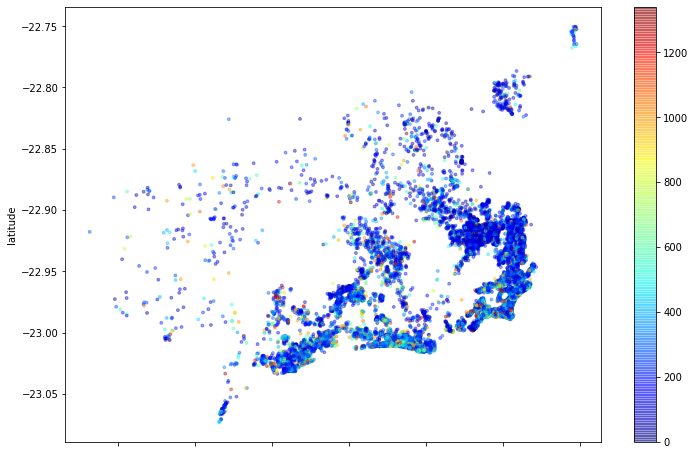

In [84]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Pelo gráfico acima, percebe-se que a maioria dos imóveis alugados ficam nos bairros litorâmeos, mais especificamente nas regioões da zona sul e da barra da Tijuca.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

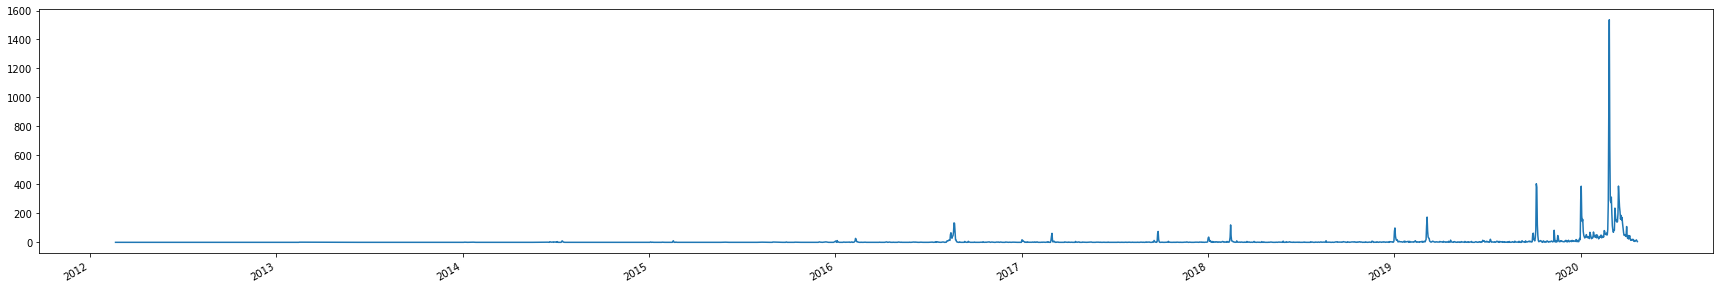

In [85]:
df['last_review'].value_counts().plot(figsize=(30,5))

Verificando o grafico do número de aluguéis pelo tempo, percebece uma certa sazionalidade que reflete cetos picos a cada período de tempo. no entanto, uma peculiaridade que ocorre é que esses picos vão ficando maiores a medida que o tempo vai passando. Esse comportamento dos dados reflete que a quantidade de imóveis alugados pela plataforma airbnb vêm aumentando. 

Esse comportamento pode ser justificado pelo aumento do número de turista na cidade do Rio de Janeiro ou pela mudança de comportamento dos usuários, que estão migrando da rede hoteleira tradicional para o airbnb, ou até mesmo uma combinação desses dois fatores.

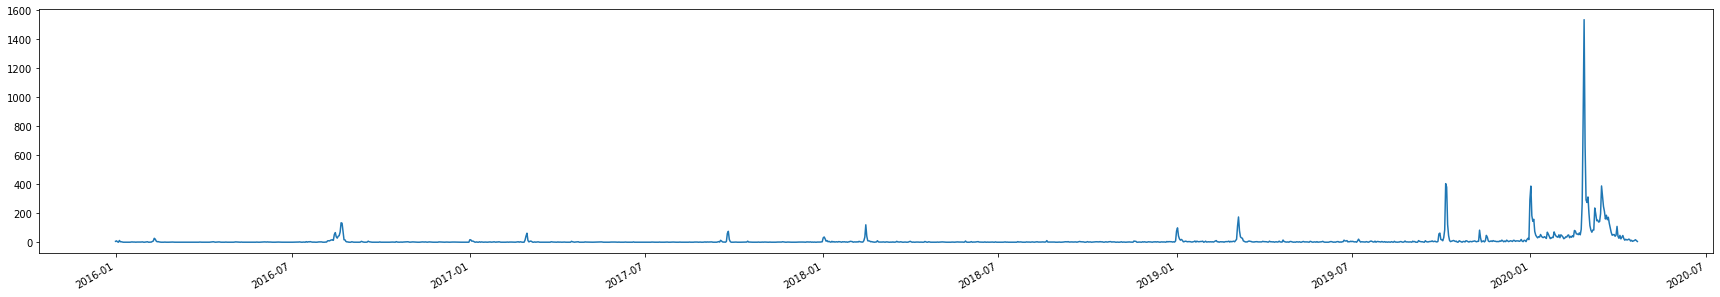

In [95]:
#df['last_review']
df[df['last_review'].dt.year > 2015]['last_review'].value_counts().plot(figsize=(30,5))

## Conclusões


Esse projeto fez a anáise dos dados da plataforma airbnb no Rio de Janeiro. Os dados utilizados apresentavam reviews desde o dia 21/02/2012 até o dia 21/04/2020, o que leva a crer que esse seja o período coberto por essa base, pois a descrição dos dados não apresenta essa especificação.

A base de dados era composta por 35870 registros e 16 variáveis.

Durante os estudos, percebeu-se que algumas variáveis apresentavam valores outliers, no entanto, duas variáveis específica apresentavam valores que flagrantemente representavam erros de preenchimento dos dados e que poderiam causar erros de interpretação. Dessa forma, optou-se por eliminar os registros que apresentavam esse tipo de distorção.

Quando analisadas as correlações dos dados numéricos, identificou-se uma alta correlação (64 %) entre as variáveis number_of_reviews e reviews_per_month, o que já era esperado, visto que tais variáveis apresentam informações bem semelhanete. Também identifocou-se uma correlaça (de 18 %) entre o preço do aluguel do imóvel e a quantidade mínima de noites para a reserva. A variável preço também apresentou correlação maior com as variáveis que indicam o número de revisões. Nesse caso, a correlação é negativa, ou seja, a medida que o preço eleva a tendência é que diminua o número de reviews.

Também foi identificado a a grande maioria dos aluguéis feitos pela plataforma Airbnb na cidade do Rio de Janeiro referem-se a aluguéis do imóvel inteiro.

Esse estudo também identificou que os bairros com os imóveis mais caros são: Lagoa, Leblon e Ipanema. Já a região com maior número de imóveis alugados é a região litorânea, mais especificamente na zona sul e Barra da Tijuca.

Verificando o gráfico que apresenta o número de reviews pelo tempo, percebe-se que há uma certa periodicidade no gráfico, com certos pontos de picos, sendo que, com o passar do tempo esses picos vão ficando mais altos, o que pode indicar que o npumero de aluguéis está crescendo, o que poderia indicar um aumento no número de turistas na cidade, ou uma mudança de comportamento dos clientes, que estariam mudando da rede hoteleira tradicional para a plataforma airbnb.